In [14]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

## Example: USDA Food Database

In [5]:
%pwd

'C:\\Users\\tmznq\\workspace\\ml_scratch\\seoul_coding_academy\\week4'

In [6]:
import json
db = json.load(open('C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch07/foods-2011-10-03.json'))
len(db)

6636

In [7]:
db[0].keys() # col_name될 요소.

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [ ]:
# 1개의 key를 선택해보자.

In [15]:
type(db[0]['nutrients'])

list

In [16]:
db[0]['nutrients'][0] 

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [17]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [18]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [19]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [21]:
info.tail()

,description,group,id,manufacturer
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None
6635,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None


In [23]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

- 모든 영양소 정보를 table에 담는다.

In [24]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [25]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


- 중복된 data를 확인하고 제거하자.

In [27]:
nutrients.duplicated().sum()

14179

In [28]:
nutrients = nutrients.drop_duplicates()

- id의 group과 description 명이 nutrients 항목과 겹치므로 이를방지하지 위해 info col 바꾸자.

In [30]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info[:5]

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [31]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients[:5]

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


- 2개의 df를 수평결합함으로써, 원하는 df 완성

In [32]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [33]:
ndata[:5]

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [35]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [47]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5) # quantile 50%에 위치하는 값을 찾음.

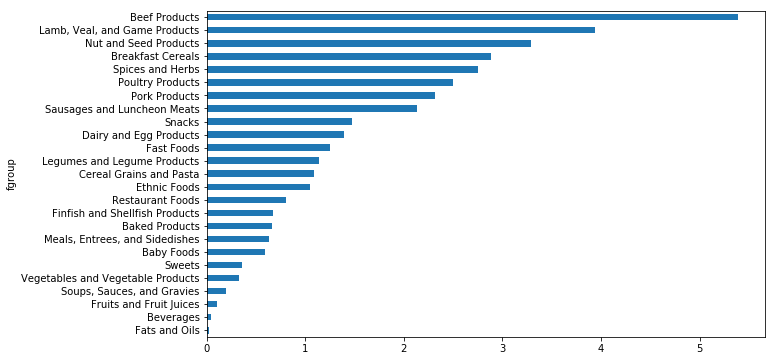

In [51]:
result['Zinc, Zn'].sort_values().plot(kind='barh', figsize = (10,6))

- 이번에는 각 영양소가 어떤 음식에 가장 많이 들어 있는지 찾아보자.
- DataFrame.xs()
- 색인을 부르는 방법이지만, 조금 다른 점은 색인에 함수를 적용할 수 있다는 점이 조금 다르다.

In [ ]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax()) # value값이 최대인 index
get_minimum = lambda x: x.xs(x.value.idxmin()) # 

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [55]:
# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [61]:
max_foods.loc['Amino Acids', 'food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

#### 정규표현식 실습문제 1
- 휴대폰 번호와 일치하는 정보를 찾아서 maddr라는 data frame을 생성하라.
- columns = [name, pnum]

In [ ]:
# 휴대폰 번호는 010 019 016

In [91]:
txt = """권오성 010-1234-5678
홍길동 02-332-7658
강감찬 019-213-2356
김유신 015-2345-6342
대마왕 114
고양이 001-82-2-345-8567
개구리 010-3489-0457"""

In [92]:
txt.split("\n")

['권오성 010-1234-5678',
 '홍길동 02-332-7658',
 '강감찬 019-213-2356',
 '김유신 015-2345-6342',
 '대마왕 114',
 '고양이 001-82-2-345-8567',
 '개구리 010-3489-0457']

In [93]:
data = []
lines = txt.split("\n")
for line in lines:
    words = line.split(" ")
    data.append(words)
    
data

[['권오성', '010-1234-5678'],
 ['홍길동', '02-332-7658'],
 ['강감찬', '019-213-2356'],
 ['김유신', '015-2345-6342'],
 ['대마왕', '114'],
 ['고양이', '001-82-2-345-8567'],
 ['개구리', '010-3489-0457']]

In [94]:
maddr_ = DataFrame(data, columns=['name', 'pnum'])
maddr_ # 임시 데이터로 사용할 때는 _ 붙이기

,name,pnum
0,권오성,010-1234-5678
1,홍길동,02-332-7658
2,강감찬,019-213-2356
3,김유신,015-2345-6342
4,대마왕,114
5,고양이,001-82-2-345-8567
6,개구리,010-3489-0457


In [107]:
pattern = '(01[67890])-([0-9]{3,4})-([0-9]{3,4})' # [0-9] = \d 랑 같은 의미 ㅎㅎ

In [106]:
mask = maddr['pnum'].str.contains(pattern) # match랑 contains 차이점좀 알아볼 것.
mask

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


0     True
1    False
2     True
3    False
4    False
5    False
6     True
Name: pnum, dtype: bool

In [105]:
maddr[mask]

,name,pnum
0,권오성,010-1234-5678
2,강감찬,019-213-2356
6,개구리,010-3489-0457


### 웹에서 이미지 크롤링 예제 해보기
- 문자열.pdf 파일에 첨부 되어 있음.